In [1]:
print("Name: Mohit Kumar\nRoll Number: 201210030\n")

Name: Mohit Kumar
Roll Number: 201210030



In [2]:
# Importing necessary modules

import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt

%matplotlib inline

## Function for Hierarchical clustering

In [3]:
def OwnHeirarchical(data, cutoff, linkage):

    # Dynamic Programming
    # 1 -> Single Linkage
    # 2 -> Complete Linkage
    # 3 -> Average Linkage

    distance_matrix = euclidean_distances(data, data)  # Distance Matrix calculation
    distance_matrix = np.tril(distance_matrix) # Matrix is symmetric so, just keep lower triangular matrix
    distance_matrix[distance_matrix == 0] = np.inf #  Replace 0 by inf for ease of calculation
    df = pd.DataFrame(data=np.ones(data.shape[0])*np.inf) # Initialized a dataframe which will store which point is in which cluster
    if cutoff > distance_matrix.shape[0]: # If user provides impractical cut-off, cluster everthing into one cluster and not listen to user 
        cutoff = distance_matrix.shape[0]
    if linkage == 1: # Single Linkage
        d = {} # This dictionary keeps record of which data points or cluster are merging, hence can be used to make a dendogram
        for i in range(0,cutoff):
            ij_min = np.unravel_index(distance_matrix.argmin(), distance_matrix.shape) 
            # From the distance matrix, get the minimum distance
            # np.unravel_index gives us the position of minimum distance. e.g. (0,4) is where minimum value is present in matrix.
            # This is what we need as in Hierarchical clustering, we merge the two pairs with minimum distance
            if i == 0:
                df.iloc[ij_min[0]] = 0
                df.iloc[ij_min[1]] = 0
            else:
                try:
                    a = int(df.iloc[ij_min[0]])
                except:
                    df.iloc[ij_min[0]] = i
                    a = i
                try:
                    b = int(df.iloc[ij_min[1]])
                except:
                    df.iloc[ij_min[1]] = i
                    b = i
                df[(df[0]==a) | (df[0]==b)] = i
            d[i] = ij_min
            #The if, else code till here is just filling the dataframe as the two points/clusters combine.
            #So, for example if 1 and 2 combines, dataframe will have 1 : 0, 2 : 0. Which means point 1 and 2 both are in same cluster (0th cluster)
            for j in range(0, ij_min[0]):
                #we want to ignore the diagonal, and diagonal is 0. We replaced 0 by infinte. 
                #So this if condition will skip diagonals
                if np.isfinite(distance_matrix[ij_min[0]][j]) and np.isfinite(distance_matrix[ij_min[1]][j]):
                    #after two points/cluster are linked, to calculate new distance we take minimum distance for single linkage
                    distance_matrix[ij_min[1]][j] = min(distance_matrix[ij_min[0]][j], distance_matrix[ij_min[1]][j])
            # To avoid the combined data points/cluster in further calculations, we make them infinte.
            #Our if loop above this, will therefore skip the infinite record entries.
            distance_matrix[ij_min[0]] = np.inf
        return d, df[0].to_numpy()
    elif linkage == 2: # Complete Linkage
        d_complete = {}
        for i in range(0,cutoff):
            ij_min = np.unravel_index(distance_matrix.argmin(), distance_matrix.shape)
            if i == 0:
                df.iloc[ij_min[0]] = 0
                df.iloc[ij_min[1]] = 0
            else:
                try:
                    a = int(df.iloc[ij_min[0]])
                except:
                    df.iloc[ij_min[0]] = i
                    a = i
                try:
                    b = int(df.iloc[ij_min[1]])
                except:
                    df.iloc[ij_min[1]] = i
                    b = i
                df[(df[0]==a) | (df[0]==b)] = i
            d_complete[i] = ij_min
            for j in range(0, ij_min[0]):
                if np.isfinite(distance_matrix[ij_min[0]][j]) and np.isfinite(distance_matrix[ij_min[1]][j]):
                    #after two points/cluster are linked, to calculate new distance we take maximum distance for complete linkage
                    distance_matrix[ij_min[1]][j] = max(distance_matrix[ij_min[0]][j], distance_matrix[ij_min[1]][j])
            distance_matrix[ij_min[0]] = np.inf
        return d_complete, df[0].to_numpy()
    elif linkage == 3: # Average Linkage
        d_average = {}
        for i in range(0,cutoff):
            ij_min = np.unravel_index(distance_matrix.argmin(), distance_matrix.shape)
            if i == 0:
                df.iloc[ij_min[0]] = 0
                df.iloc[ij_min[1]] = 0
            else:
                try:
                    a = int(df.iloc[ij_min[0]])
                except:
                    df.iloc[ij_min[0]] = i
                    a = i
                try:
                    b = int(df.iloc[ij_min[1]])
                except:
                    df.iloc[ij_min[1]] = i
                    b = i
                df[(df[0]==a) | (df[0]==b)] = i
            d_average[i] = ij_min
            for j in range(0, ij_min[0]):
                if np.isfinite(distance_matrix[ij_min[0]][j]) and np.isfinite(distance_matrix[ij_min[1]][j]):
                    #after two points/cluster are linked, to calculate new distance we take average distance for average linkage
                    distance_matrix[ij_min[1]][j] = (distance_matrix[ij_min[0]][j] + distance_matrix[ij_min[1]][j])/2.0          
            distance_matrix[ij_min[0]] = np.inf
        return d_average, df[0].to_numpy()

## Testing our function on Iris dataset

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
iris_data = iris.data
d, target = OwnHeirarchical(iris_data, 147, 1) 
#147 iterations is the cut-off which will give us 3 clusters, 1 is single linkage

In [5]:
d #this will show which data points combines when

{0: (39, 7),
 1: (17, 0),
 2: (34, 9),
 3: (48, 10),
 4: (132, 128),
 5: (28, 27),
 6: (81, 80),
 7: (96, 95),
 8: (4, 0),
 9: (27, 0),
 10: (37, 4),
 11: (40, 17),
 12: (47, 3),
 13: (49, 7),
 14: (91, 63),
 15: (92, 82),
 16: (137, 116),
 17: (3, 2),
 18: (7, 0),
 19: (9, 1),
 20: (12, 1),
 21: (21, 19),
 22: (38, 8),
 23: (46, 19),
 24: (30, 29),
 25: (45, 1),
 26: (75, 65),
 27: (93, 57),
 28: (99, 96),
 29: (138, 127),
 30: (95, 88),
 31: (80, 69),
 32: (29, 9),
 33: (139, 112),
 34: (126, 123),
 35: (26, 23),
 36: (42, 38),
 37: (89, 53),
 38: (97, 74),
 39: (25, 9),
 40: (84, 66),
 41: (143, 120),
 42: (11, 7),
 43: (23, 7),
 44: (43, 26),
 45: (127, 70),
 46: (147, 110),
 47: (73, 63),
 48: (82, 67),
 49: (19, 17),
 50: (58, 54),
 51: (65, 58),
 52: (116, 103),
 53: (145, 141),
 54: (146, 123),
 55: (78, 63),
 56: (144, 140),
 57: (148, 136),
 58: (6, 2),
 59: (52, 50),
 60: (87, 68),
 61: (94, 90),
 62: (122, 105),
 63: (56, 51),
 64: (113, 101),
 65: (130, 107),
 66: (140, 12

In [6]:
#as we can see, 34 and 9 combines first and so on. If 9 is combining again with 37, it means cluster 0 is combining with 1 and so on.

In [7]:
target

array([140., 140., 140., 140., 140., 140., 140., 140., 140., 140., 140.,
       140., 140., 140., 140., 140., 140., 140., 140., 140., 140., 140.,
       140., 140., 140., 140., 140., 140., 140., 140., 140., 140., 140.,
       140., 140., 140., 140., 140., 140., 140., 140., 140., 140., 140.,
       140., 140., 140., 140., 140., 140., 146., 146., 146., 144., 146.,
       146., 146., 144., 146., 144., 144., 146., 144., 146., 144., 146.,
       146., 144., 144., 144., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 144., 144., 144., 144., 146., 146., 146., 146., 144.,
       146., 144., 144., 146., 144., 144., 144., 146., 146., 146., 144.,
       146., 146., 146., 146., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 146., 146., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 146., 146., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 146., 146., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 146., 146., 146., 146., 146.])

In [8]:
# Let's convert it to iris.target format
target[target == 140] = 0
target[target == 144] = 1
target[target == 146] = 2

In [9]:
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 2.,
       2., 2., 1., 2., 1., 1., 2., 1., 1., 1., 2., 2., 2., 1., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [10]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Visualizing the data

In [11]:
plt.scatter(iris_data[:,1], iris_data[:,2], c=target, cmap="rainbow")

In [12]:
plt.scatter(iris_data[:,2], iris_data[:,3], c=target, cmap="rainbow")

In [13]:
plt.scatter(iris_data[:,1], iris_data[:,3], c=target, cmap="rainbow")

In [14]:
# Performance of Hierarchical is not that great compared to KMeans. It worked great on convoluted data sets

## Performance of complete and average linkages

In [15]:
d_complete, target_complete = OwnHeirarchical(iris_data, 147, 2) #2 for complete linkage

In [16]:
d_complete

{0: (39, 7),
 1: (17, 0),
 2: (34, 9),
 3: (48, 10),
 4: (132, 128),
 5: (28, 27),
 6: (81, 80),
 7: (96, 95),
 8: (4, 0),
 9: (37, 4),
 10: (40, 17),
 11: (47, 3),
 12: (49, 7),
 13: (91, 63),
 14: (92, 82),
 15: (137, 116),
 16: (12, 1),
 17: (21, 19),
 18: (27, 0),
 19: (38, 8),
 20: (46, 19),
 21: (30, 29),
 22: (45, 1),
 23: (75, 65),
 24: (93, 57),
 25: (99, 96),
 26: (138, 127),
 27: (9, 1),
 28: (139, 112),
 29: (95, 88),
 30: (126, 123),
 31: (26, 23),
 32: (42, 38),
 33: (89, 53),
 34: (97, 74),
 35: (25, 9),
 36: (84, 66),
 37: (143, 120),
 38: (11, 7),
 39: (43, 26),
 40: (147, 110),
 41: (29, 3),
 42: (73, 63),
 43: (58, 54),
 44: (145, 141),
 45: (146, 123),
 46: (78, 63),
 47: (116, 103),
 48: (144, 140),
 49: (148, 136),
 50: (6, 2),
 51: (52, 50),
 52: (80, 69),
 53: (87, 68),
 54: (94, 90),
 55: (122, 105),
 56: (56, 51),
 57: (113, 101),
 58: (130, 107),
 59: (142, 113),
 60: (86, 52),
 61: (149, 127),
 62: (31, 20),
 63: (82, 67),
 64: (124, 120),
 65: (140, 120),
 

In [17]:
target_complete

array([141., 141., 141., 141., 141., 141., 141., 141., 141., 141., 141.,
       141., 141., 141., 141., 141., 141., 141., 141., 141., 141., 141.,
       141., 141., 141., 141., 141., 141., 141., 141., 141., 141., 141.,
       141., 141., 141., 141., 141., 141., 141., 141., 141., 141., 141.,
       141., 141., 141., 141., 141., 141., 146., 146., 146., 143., 146.,
       143., 146., 143., 146., 143., 143., 143., 143., 143., 143., 146.,
       143., 143., 146., 143., 143., 143., 143., 143., 143., 146., 146.,
       146., 143., 143., 143., 143., 143., 143., 143., 146., 146., 146.,
       143., 143., 143., 143., 143., 143., 143., 143., 143., 143., 143.,
       143., 146., 143., 146., 146., 146., 146., 143., 146., 146., 146.,
       146., 146., 146., 143., 143., 146., 146., 146., 146., 143., 146.,
       143., 146., 143., 146., 146., 143., 143., 146., 146., 146., 146.,
       146., 143., 146., 146., 146., 146., 143., 146., 146., 146., 143.,
       146., 146., 146., 143., 146., 146., 143.])

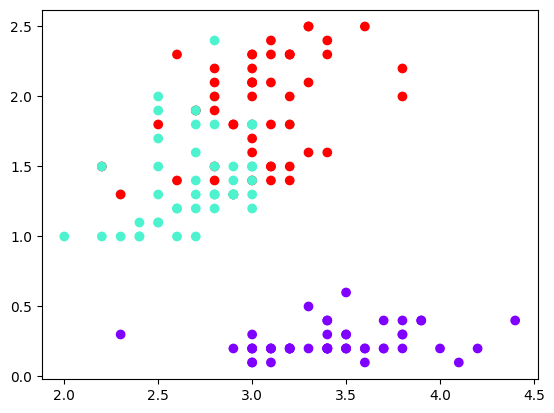

In [18]:
plt.scatter(iris_data[:,1], iris_data[:,3], c=target_complete, cmap="rainbow")

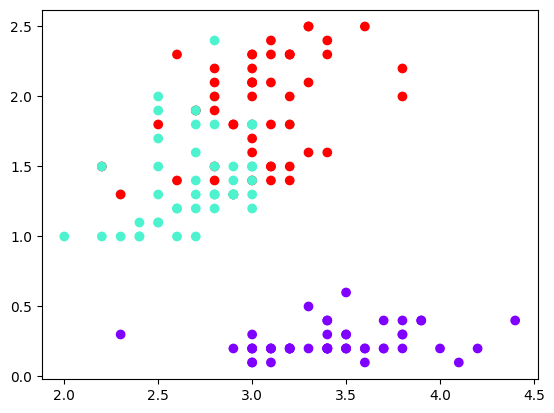

In [19]:
plt.scatter(iris_data[:,1], iris_data[:,3], c=target_complete, cmap="rainbow")

In [20]:
#This is because we are plotting it in 2-dimension but the data is in 4-dimensions.

In [21]:
#Let's use average linkage now

In [22]:
d_average, target_average = OwnHeirarchical(iris_data, 147, 3) #3 is for average linkage

In [23]:
d_average

{0: (39, 7),
 1: (17, 0),
 2: (34, 9),
 3: (48, 10),
 4: (132, 128),
 5: (28, 27),
 6: (81, 80),
 7: (96, 95),
 8: (4, 0),
 9: (37, 4),
 10: (40, 17),
 11: (47, 3),
 12: (49, 7),
 13: (91, 63),
 14: (92, 82),
 15: (137, 116),
 16: (27, 0),
 17: (12, 1),
 18: (21, 19),
 19: (38, 8),
 20: (46, 19),
 21: (30, 29),
 22: (45, 1),
 23: (75, 65),
 24: (93, 57),
 25: (99, 96),
 26: (138, 127),
 27: (9, 1),
 28: (95, 88),
 29: (139, 112),
 30: (126, 123),
 31: (7, 0),
 32: (3, 2),
 33: (29, 3),
 34: (26, 23),
 35: (42, 38),
 36: (89, 53),
 37: (97, 74),
 38: (25, 9),
 39: (84, 66),
 40: (80, 69),
 41: (143, 120),
 42: (11, 7),
 43: (43, 26),
 44: (147, 110),
 45: (73, 63),
 46: (58, 54),
 47: (145, 141),
 48: (146, 123),
 49: (116, 103),
 50: (78, 63),
 51: (144, 140),
 52: (148, 136),
 53: (127, 70),
 54: (82, 67),
 55: (6, 2),
 56: (52, 50),
 57: (87, 68),
 58: (94, 90),
 59: (122, 105),
 60: (56, 51),
 61: (113, 101),
 62: (130, 107),
 63: (142, 113),
 64: (65, 58),
 65: (140, 120),
 66: (19

In [24]:
target_average

array([135., 135., 135., 135., 135., 135., 135., 135., 135., 135., 135.,
       135., 135., 135., 135., 135., 135., 135., 135., 135., 135., 135.,
       135., 135., 135., 135., 135., 135., 135., 135., 135., 135., 135.,
       135., 135., 135., 135., 135., 135., 135., 135., 135., 135., 135.,
       135., 135., 135., 135., 135., 135., 146., 146., 146., 143., 146.,
       146., 146., 143., 146., 143., 143., 146., 143., 146., 143., 146.,
       146., 143., 146., 143., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 143., 143., 143., 143., 146., 146., 146., 146., 146.,
       146., 143., 146., 146., 143., 143., 146., 146., 146., 146., 143.,
       146., 146., 146., 146., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 146., 146., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 146., 146., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 146., 146., 146., 146., 146., 146., 146., 146., 146.,
       146., 146., 146., 146., 146., 146., 146.])

In [25]:
target_average[target_average == 135] = 0
target_average[target_average == 143] = 1
target_average[target_average == 146] = 2

In [26]:
target_average

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       2., 2., 1., 2., 2., 2., 1., 2., 1., 1., 2., 1., 2., 1., 2., 2., 1.,
       2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 1., 2., 2., 1., 1., 2., 2., 2., 2., 1., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [27]:
plt.scatter(iris_data[:,1], iris_data[:,2], c=target_average, cmap="rainbow")

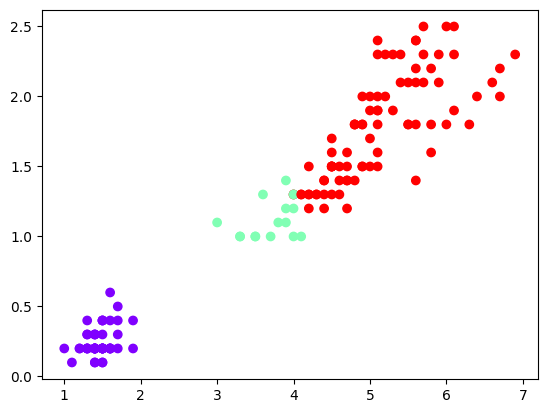

In [28]:
plt.scatter(iris_data[:,2], iris_data[:,3], c=target_average, cmap="rainbow")

In [29]:
plt.scatter(iris_data[:,1], iris_data[:,3], c=target_average, cmap="rainbow")

In [30]:
100 - (iris.target != target_average).sum()/float(iris.target.size)*100

77.33333333333334

In [31]:
#So, 77% accuracy. This is lot less than using KMeans on this. Refer my KMeans repo for my KMeans code and example.

In [32]:
100 - (iris.target != target).sum()/float(iris.target.size)*100

80.0

In [33]:
#Single linkage gave us 80% accuracy compared to average linkage

In [34]:
target_complete[target_complete == 141] = 0
target_complete[target_complete == 143] = 1
target_complete[target_complete == 146] = 2

In [35]:
100 - (iris.target != target_complete).sum()/float(iris.target.size)*100

81.33333333333333

In [36]:
#complete linkage gave us 84% accuracy. So, for our iris data set, accuracy was high using complete linkage but not as high as KMeans.